# 吴恩达机器学习课后习题

# #ex1 实现单变量线性回归，多变量线性回归

## 1.  Linear regression with one variable 单变量线性回归

In [1]:
import numpy as np #导入numpy库并另名为np，用于矩阵运算
import pandas as pd #导入pandas库并另名为pd，用于高效数据分析
import matplotlib.pyplot as plt #导入matplotlib库并另名为plt，用于产品级2D图形绘制

data = pd.read_csv('ex1data1.txt',header = None, names=['Population', 'Profit'])#读取数据并赋予列名
#type(data)查看数据类型

In [2]:
data.head()#看前五行#

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.info()#查看数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data.shape#查看数据的大小

(97, 2)

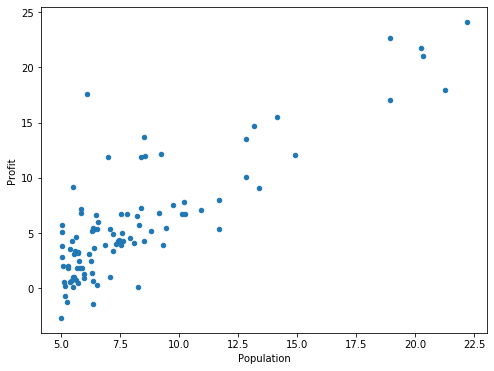

In [5]:
#画散点图
data.plot(kind='scatter',x='Population',y='Profit',figsize=(8,6))
plt.show()

In [6]:
#定义代价函数
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T)-y),2)
    return np.sum(inner)/(2*X.shape[0])

In [7]:
#在训练集中添加一列，一边可使用向量化的解决方案来计算代价和梯度
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
#设置x训练集和y值
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行去掉最后一列
y = data.iloc[:,cols-1:]#y是所有行，最后一列

In [9]:
#将X，y转化为矩阵（matrix），并初始化系数theta
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [10]:
#看下维度
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [11]:
#计算代价函数(theat初始值为0)
computeCost(X,y,theta)

32.072733877455676

In [12]:
#bath gradient decent(批量梯度下降)
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))#theta的零时存储空间 
    parameters = int(theta.ravel().shape[1])#ravel（）将数据降成一维，实际上是theta的个数
    cost = np.zeros(iters)#记录iters次迭代过程中，每次迭代的损耗
    
    #theta的迭代更新过程
    for i in range(iters):
        error = (X * theta.T) - y 
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [13]:
#初始化一些附加变量
alpha = 0.01#学习速率alpha
iters = 1000#迭代次数

In [14]:
#运行梯度下降算法来将参数theta合于训练集
g ,cost = gradientDescent(X,y,theta,alpha,iters)

In [15]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [16]:
#拟合的参数计算训练模型的代价误差
computeCost(X,y,g)

4.515955503078914

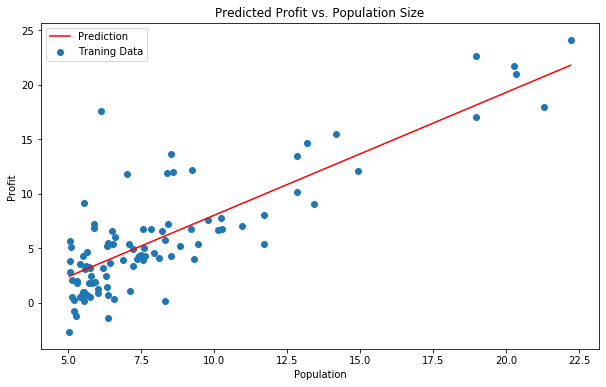

In [17]:
#绘制线性模型以及数据
x = np.linspace(data.Population.min(),data.Population.max(),100)

f = g[0,0] + (g[0,1]*x)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

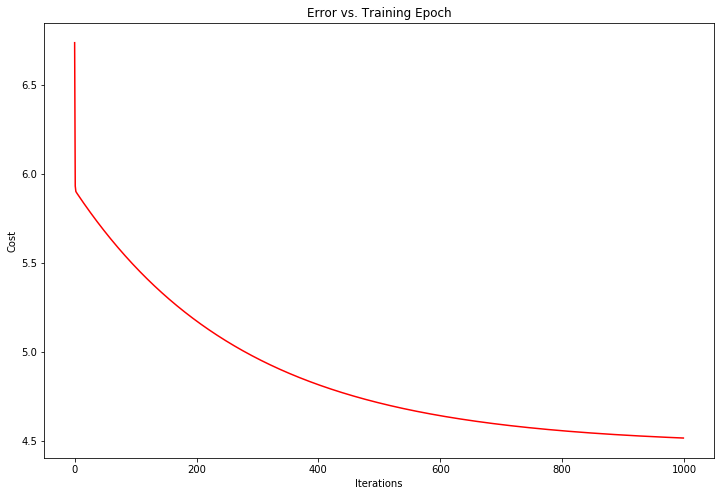

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 2. Linear regression with multiple variable 多变量线性回归


In [19]:
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
data2 = pd.read_csv('ex1data2.txt',header = None, names=['Size','Population', 'Profit'])#读取数据并赋予列

In [20]:
data2.head()

,Size,Population,Profit
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
#特征归一化
#mean()是平均值，std()是标准差
data2 = (data2 - data2.mean()) /data2.std()

In [22]:
#在训练集中添加一列，一边可使用向量化的解决方案来计算代价和梯度
data2.insert(0,'Ones',1)
data2.head()

,Ones,Size,Population,Profit
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


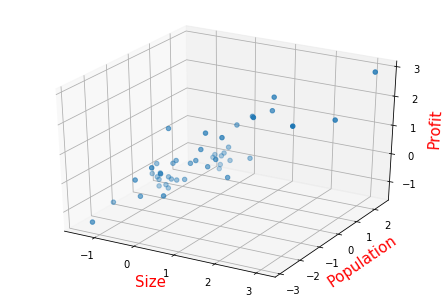

In [23]:
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2.iloc[:,1],data2.iloc[:,2],data2.iloc[:,3])
  
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Profit', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Population', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('Size', fontdict={'size': 15, 'color': 'red'})
plt.show()

In [24]:
#设置x训练集和y值
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]#X是所有行去掉最后一列
y2= data2.iloc[:,cols-1:]#y是所有行，最后一列

In [25]:
#将X，y转化为矩阵（matrix），并初始化系数theta
X2 = np.matrix(X2)
y2 = np.matrix(y2)
theta2 = np.matrix(np.array([0,0,0]))

In [26]:
g2,cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [27]:
g2

matrix([[-1.03191687e-16,  8.78503652e-01, -4.69166570e-02]])

In [28]:
# 得到模型误差
computeCost(X2, y2, g2)

0.13070336960771892

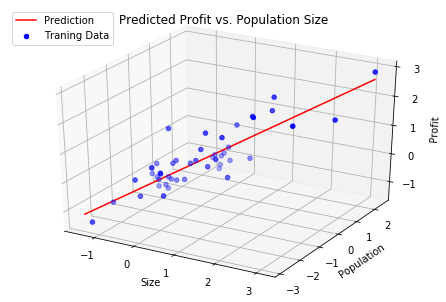

In [32]:
#绘制线性模型以及数据
fig = plt.figure()
ax = Axes3D(fig)

x1 = np.linspace(data2.Size.min(),data2.Size.max(),100)
x2 = np.linspace(data2.Population.min(),data2.Population.max(),100)

f = g2[0,0]+g2[0,1]*x1+g2[0,2]*x2
#f= np.sum(np.multiply(np.matrix(data2.iloc[:,0:3]),g2),axis=1)

ax.scatter(data2.iloc[:,1],data2.iloc[:,2],data2.iloc[:,3],color = 'b',label='Traning Data')
#ax.plot(np.array(data2.iloc[:,1]),np.array(data2.iloc[:,2]),f[:,0].reshape(47,1),color = 'r',label='Prediction')
ax.plot(x1,x2,f,color = 'r',label='Prediction')  
ax.legend(loc=2)
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Profit')
ax.set_ylabel('Population')
ax.set_xlabel('Size')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

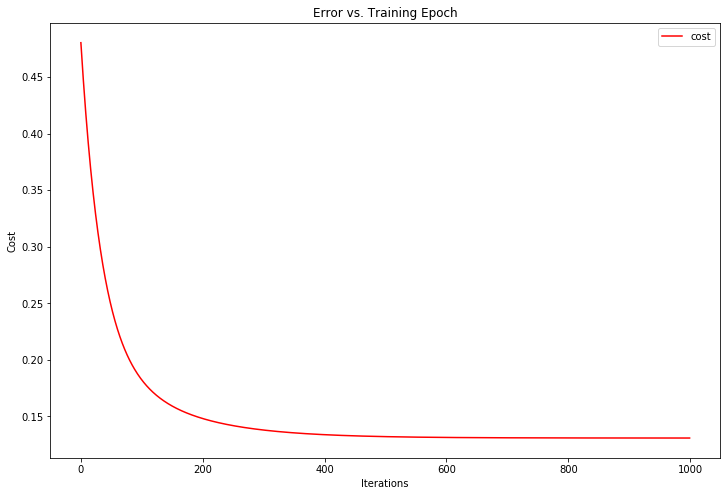

In [35]:
#查看训练过程
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r',label='cost')
ax.legend(loc=1)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3.正规方程 normal equation

In [43]:
#正规方程
def normalEqn(X,y):
    theta = (X.T *X).I*X.T*y
    return theta

In [44]:
final_theta2 = normalEqn(X,y)

In [45]:
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

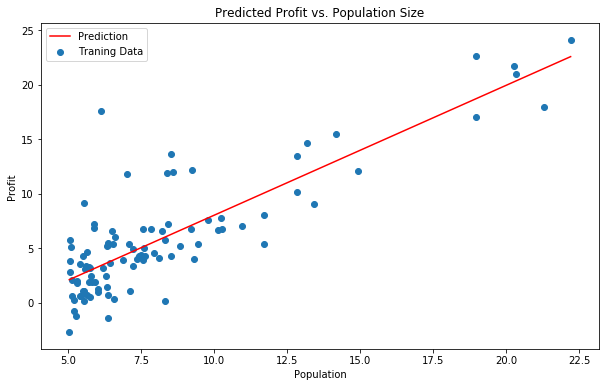

In [51]:
#绘制线性模型以及数据
x = np.linspace(data.Population.min(),data.Population.max(),100)

f = final_theta2[0,0] + (final_theta2[1,0]*x)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()